In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### consider the simple case of a classification task, in which the two classes of points are well separated:

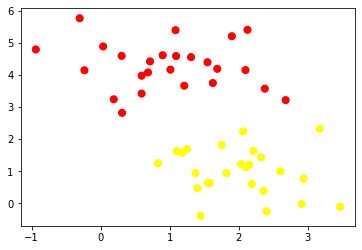

In [37]:
from sklearn.datasets._samples_generator import make_blobs

x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.75)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

##### A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. 
##### For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: 
##### There is more than one possible dividing line that can perfectly discriminate between the two classes!

(-1.0, 3.5)

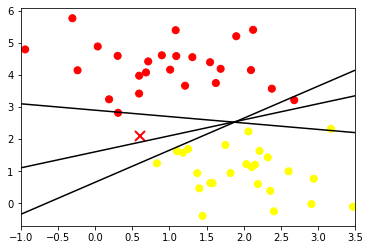

In [38]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

### These are three very different separators which, nevertheless, perfectly discriminate between these samples.
### Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

## Support Vector Machines: Maximizing the Margin

####  Rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.
#### In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

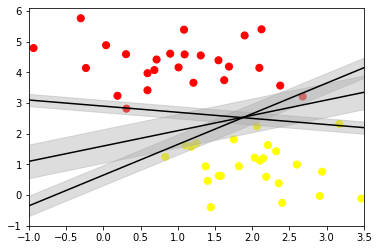

In [39]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Fitting a support vector machine

In [40]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x, y)

SVC(kernel='linear')

#### To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [41]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

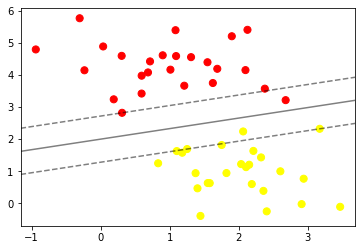

In [42]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

##### This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin. 
##### These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier

In [43]:
model.support_vectors_

array([[0.31043077, 2.81818998],
       [2.67858605, 3.21301307],
       [1.25220306, 1.68850246],
       [2.06314254, 2.23706653],
       [3.17145667, 2.31958054]])